# Exercise 4: Imitation Learning and Offline Reinforcement Learning

---

> **Reinforcement Learning** in Winter Semester 2025/2026
>
> - Prof. Gerhard Neumann and Prof. Rudolf Lioutikov
> - Instructor for this exercise: Hongyi Zhou (hongyi.zhou@kit.edu)
> 
> ⚠️ For general questions about the exercises, please post in the Ilias forum so we can answer them once for all students. Only use email for individual questions whose answers are not relevant to all students.

---

# Group Submission

The exercise sheets can be submitted in groups of up to **3 students**. **Only one member in the group is required to upload the final version via Ilias**.

Groups are automatically recorded, so **please enter the u-identifiers of your group members in the following cell.** If your group consists of only 2 students, or if you are submitting alone, leave the remaining fields empty. Here is an **example** for a group consisting of uabcd and uefgh:

_U-identifiers of group members:_

_Member 1: uabcd_

_Member 2: uefgh_

_Member 3:_

U-identifiers of group members:

Member 1:

Member 2:

Member 3:

# Auto-grading

We use an auto-grading system that automatically analyzes your submitted Jupyter Notebooks and checks them for correctness using hidden tests. These tests determine the points you receive for the exercise sheet.

To ensure auto-grading works smoothly, please note the following:

- The notebook must have the filename "ex_04_offline_rl.ipynb"
- Upload Jupyter Notebook on Ilias (not as a zip!)
- Before submitting a notebook, test that everything runs without errors from start to finish.
- Cells marked with "##### DO NOT CHANGE #####" must not be edited or deleted
- Your solution must be entered in the correct cell (marked with "# YOUR CODE HERE").
  - Please delete the **NotImplementedError!**
- Generally, **do not delete any cells** and **do not add any cells**. The cells where your solution should be entered already exist (marked with "# YOUR CODE HERE").
- There may be seemingly empty cells that are also marked with "##### DO NOT CHANGE #####". These must also not be edited or deleted.
  - If you do modify them, auto-grading will not work and you will receive no points.
  - We will be strict about this and make no exceptions if someone modifies cells clearly marked as readonly!
- The Jupyter Notebooks have inline tests (visible to you) that check your result for basic correctness.
  - These are primarily for you to identify and correct errors.
  - However, the inline tests you can see in the notebook are not the tests used for grading!
  - The inline tests are a necessary but not sufficient condition to receive points when grading the task!

## Local Setup

If you prefer to work locally, see the following instructions for setting up Python in a virtual environment.
You can then ignore the instructions in "Colab Setup".

If you haven't yet, create a [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html) environment using:
```
conda create --name rl_exercises
conda activate rl_exercises
```
Torch recommends installation using conda rather than pip, so run:
```
conda install pytorch cpuonly -c pytorch
```
If you have a CUDA-enabled GPU and would like to use it, visit [the installation page](https://pytorch.org/get-started/locally/) to see the options available for different CUDA versions.
The remaining dependencies can be installed with pip:
```
pip install minari gymnasium[mujoco] matplotlib numpy tqdm
```

Even if you are running the Jupyter notebook locally, please run the code cells in **Colab Setup**, because they define some global variables required later.

## Colab Setup

Google Colab provides you with a temporary environment for python programming.
While this conveniently works on any platform and internally handles dependency issues and such, it also requires you to set up the environment from scratch every time.
The "Colab Setup" section below will be part of **every** exercise and contains utility that is needed before getting started.

There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window).
Any changes you make to the Jupyter notebook itself should be saved to your Google Drive.
We also save all recordings and logs in it by default so that you won't lose your work in the event of an instance timeout.
However, you will need to re-mount your Google Drive and re-install packages with every new instance.

In [1]:
##### DO NOT CHANGE #####
# Colab setup - install dependencies
try:
    import google.colab
    COLAB = True
    %pip install -q minari gymnasium[mujoco] matplotlib numpy tqdm torch
except ImportError:
    COLAB = False

print("Setup complete!")

##### DO NOT CHANGE #####

Setup complete!


# Part 1: Self-Attention

In this exercise, you will implement a function to compute the most fundamental variant of self-attention, known as the scaled dot-product attention. This mechanism is a cornerstone in many state-of-the-art models, particularly in natural language processing and imitation learning.

Your task is to fill in a function that computes the scaled dot-product attention of input vectors. The input to your function will be three matrices: Queries (Q), Keys (K), and Values (V), each with a shape of $(n, d_k)$, where $n$ represents the number of embeddings and $d_k$ represents the embedding dimension.

The scaled dot-product attention is mathematically represented as:
$$
\text{Attention}(Q,K,V) = \text{softmax}(\frac{Q K^T}{\sqrt{d_k}})V
$$

In [18]:
import math
import torch
import torch.nn.functional as F
from tqdm import tqdm

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32

def self_attention(Q, K, V):
    """
    Implement the self-attention mechanism.

    Parameters:
    Q (torch.Tensor): Query matrix
    K (torch.Tensor): Key matrix
    V (torch.Tensor): Value matrix

    Returns:
    torch.Tensor: Output of self-attention mechanism
    """

    # YOUR CODE HERE
    n, d_k = K.size()
    output = torch.softmax(Q@K.T / d_k**0.5, 1) @ V

    return output


for _ in tqdm(range(2000)):
    inputs = torch.randn(10, 20).to(DEVICE).to(dtype)
    d_k = inputs.shape[-1]

    ### Initialize the weights matrix for Q, K, V
    W_q = torch.randn(d_k, d_k).to(DEVICE).to(dtype)
    W_k = torch.randn(d_k, d_k).to(DEVICE).to(dtype)
    W_v = torch.randn(d_k, d_k).to(DEVICE).to(dtype)

    ### Calculate the Q, K, V from embeddings
    Q = torch.matmul(inputs, W_q)
    K = torch.matmul(inputs, W_k)
    V = torch.matmul(inputs, W_v)

    # Call your self_attention function
    output_vectors = self_attention(Q, K, V)

    # Verify the results
    self_attention_builtin = F.scaled_dot_product_attention(Q, K, V)
    assert torch.allclose(self_attention_builtin, output_vectors, atol=1e-4),"\n The implementation seems to be incorrect!"

print("\n The implementation seems to be correct!")

100%|██████████| 2000/2000 [00:00<00:00, 5628.36it/s]


 The implementation seems to be correct!


In [19]:
##### DO NOT CHANGE #####
# ID: cell-455f4d796657b514 - possible points: 4

# Test self-attention implementation
print("Testing self-attention...")
SEED = 42

torch.manual_seed(SEED)
test_Q = torch.randn(10, 20).to(DEVICE).to(dtype)
test_K = torch.randn(10, 20).to(DEVICE).to(dtype)
test_V = torch.randn(10, 20).to(DEVICE).to(dtype)

result = self_attention(test_Q, test_K, test_V)
expected = F.scaled_dot_product_attention(test_Q, test_K, test_V)

assert result.shape == test_V.shape, f"Output shape {result.shape} should match V shape {test_V.shape}"
assert torch.allclose(result, expected, atol=1e-4), "Self-attention output does not match expected"

print("✓ Self-attention passed basic tests!")



##### DO NOT CHANGE #####

Testing self-attention...
✓ Self-attention passed basic tests!


## Imports and Utilities for Part 2 and 3

In [20]:
##### DO NOT CHANGE #####
import os
import random
from copy import deepcopy
from typing import Dict, List, Tuple, Optional, Union

import minari
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from tqdm import trange

import matplotlib.pyplot as plt
from IPython.display import clear_output


SEED = 42

def update_plot(iterations, rewards, algorithm='AWAC'):
    """
    Update the training progress plot with new iterations and rewards.
    """
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))
    plt.plot(iterations, rewards, label=f'{algorithm}')
    plt.xlabel('Iterations')
    plt.ylabel('Episode Return')
    plt.title(f'Learning Curve of the {algorithm} Algorithm')
    plt.legend()
    plt.grid(True)
    plt.show()


def set_seed(seed: int):
    """
    Sets a fixed random seed for reproducibility.
    """
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)


def set_seed(
    seed: int, env: Optional[gym.Env] = None
):
    """
    Sets a fixed random seed for various modules and the environment (if provided)
    to ensure reproducibility.

    Parameters:
    - seed (int): The random seed to set.
    - env (Optional[gym.Env]): The gym environment to set the seed for.
    Defaults to None.

    Description:
    - If an environment is provided, its seed and action space seed are set to
    ensure consistent results in the environment.
    - Sets the PYTHONHASHSEED environment variable, which controls the randomness
    of Python's hash-based operations.
    - Initializes the random seeds for NumPy, Python's built-in random module,
    and PyTorch to ensure consistent random number generation across these libraries.
    """
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    if env is not None:
        # Gymnasium: seed at reset-time, plus spaces if you want deterministic sampling.
        try:
            env.action_space.seed(seed)
        except Exception:
            pass
        try:
            env.observation_space.seed(seed)
        except Exception:
            pass


def compute_mean_std_from_minari(minari_dataset) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Compute the mean and standard deviation of observations and actions from a Minari dataset.

    Parameters:
    - minari_dataset: The Minari dataset to compute statistics from.

    Returns:
    - Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        (state_mean, state_std, action_mean, action_std)
    """
    all_observations = []
    all_actions = []
    for ep in minari_dataset.iterate_episodes():
        obs = np.asarray(ep.observations)
        act = np.asarray(ep.actions)
        all_observations.append(obs)
        all_actions.append(act)

    all_observations = np.concatenate(all_observations, axis=0)
    all_actions = np.concatenate(all_actions, axis=0)

    state_mean = all_observations.mean(axis=0)
    state_std = all_observations.std(axis=0) + 1e-8  # Add small epsilon for numerical stability
    action_mean = all_actions.mean(axis=0)
    action_std = all_actions.std(axis=0) + 1e-8

    return state_mean, state_std, action_mean, action_std

def wrap_env(
    env: gym.Env,
    state_mean: Union[np.ndarray, float] = 0.0,
    state_std: Union[np.ndarray, float] = 1.0,
) -> gym.Env:
    """
    Wraps a gym environment to normalize its states.

    Parameters:
    - env (gym.Env): The gym environment to wrap.
    - state_mean (Union[np.ndarray, float]): The mean used for state normalization, can be a scalar or an array. Defaults to 0.0.
    - state_std (Union[np.ndarray, float]): The standard deviation used for state normalization, can be a scalar or an array. Defaults to 1.0.

    Returns:
    - gym.Env: The wrapped gym environment with state normalization.

    Description:
    - Normalizes the states of the environment by subtracting the mean and dividing by the standard deviation.
    - Utilizes the TransformObservation wrapper from gym.wrappers to apply the normalization.
    """
    def normalize_state(state):
        return (state - state_mean) / state_std

    # Gymnasium >= 1.0 requires observation_space argument
    env = gym.wrappers.TransformObservation(
        env, normalize_state, observation_space=env.observation_space
    )
    return env


@torch.no_grad()
def evaluate_policy(
        env: gym.Env, policy: torch.nn.Module, num_episodes: int = 10,
        seed: int = 0) -> np.ndarray:
    """
    Evaluates a policy in the given environment over a specified number of episodes.

    Parameters:
    - env (gym.Env): The gym environment to evaluate the policy in.
    - policy (torch.nn.Module): The policy model to evaluate.
    - num_episodes (int): The number of episodes to run the evaluation for. Defaults to 10.
    - seed (int): The random seed for environment reproducibility. Defaults to 0.

    Returns:
    - np.ndarray: An array of cumulative rewards received in each episode.

    Description:
    - Sets the seed for the environment for consistent episode generation.
    - Puts the policy in evaluation mode to disable any training-specific operations like dropout.
    - Runs the policy for a specified number of episodes, collecting total rewards per episode.
    - Switches the policy back to training mode after evaluation.
    - Uses PyTorch's no_grad context manager to disable gradient calculations, improving performance.
    """
    policy.eval()
    episode_rewards = []
    for ep in range(num_episodes):
        obs, _info = env.reset(seed=seed + ep)
        episode_reward = 0.0
        terminated = False
        truncated = False

        while not (terminated or truncated):
            action = policy.act(obs, device=DEVICE)
            obs, reward, terminated, truncated, _info = env.step(action)
            episode_reward += float(reward)
        episode_rewards.append(episode_reward)

    policy.train()
    return np.array(episode_rewards)

##### DO NOT CHANGE #####

## Policy Network (Actor)

The following neural network is trained to represent the policy `p(a|s)`, the forward function return action **sampled** from predict distribution, along with its log-probability.

In [21]:
##### DO NOT CHANGE #####
class Actor(nn.Module):
    def __init__(
        self,
        state_dim: int,
        action_dim: int,
        hidden_dim: int,
        min_log_std: float = -20.0,
        max_log_std: float = 2.0,
        min_action: float = -1.0,
        max_action: float = 1.0,
    ):
        """
        An actor class that defines a policy network for reinforcement learning.

        Parameters:
        - state_dim (int): Dimension of the state space.
        - action_dim (int): Dimension of the action space.
        - hidden_dim (int): Dimension of the hidden layers in the neural network.
        - min_log_std (float): Minimum logarithm of the standard deviation for the action distribution. Defaults to -20.0.
        - max_log_std (float): Maximum logarithm of the standard deviation for the action distribution. Defaults to 2.0.
        - min_action (float): Minimum action value. Defaults to -1.0.
        - max_action (float): Maximum action value. Defaults to 1.0.

        Description:
        - Initializes a policy network using a multilayer perceptron (MLP) with ReLU activations.
        - The network predicts the mean of the action distribution.
        - The standard deviation of the action distribution is parameterized as a learnable parameter, clamped between specified min and max log values.
        - The action range is bounded between specified min and max values.
        """
        super().__init__()
        self._mlp = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
        )
        self.register_buffer("_log_std", torch.full((action_dim,), -1.0, dtype=torch.float32))
        self._min_log_std = min_log_std
        self._max_log_std = max_log_std
        self._min_action = min_action
        self._max_action = max_action

    def _get_policy(self, state: torch.Tensor) -> torch.distributions.Distribution:
        """
        Computes the policy distribution for a given state.

        Parameters:
        - state (torch.Tensor): The state tensor.

        Returns:
        - torch.distributions.Distribution: The policy distribution as a Normal distribution.

        Description:
        - Passes the state through the MLP to get the mean of the action distribution.
        - Clamps the logarithm of the standard deviation within the specified range.
        - Constructs a Normal distribution with the computed mean and standard deviation.
        """
        mean = self._mlp(state)
        log_std = self._log_std.clamp(self._min_log_std, self._max_log_std)
        policy = torch.distributions.Normal(mean, log_std.exp())
        return policy

    def log_prob(self, state: torch.Tensor, action: torch.Tensor) -> torch.Tensor:
        """
        Computes the log probability of a given action under the policy for a given state.

        Parameters:
        - state (torch.Tensor): The state tensor.
        - action (torch.Tensor): The action tensor.

        Returns:
        - torch.Tensor: The log probability of the action under the policy.

        Description:
        - Retrieves the policy distribution for the given state.
        - Calculates the log probability of the given action under this distribution.
        - Sums the log probabilities across the action dimensions.
        """
        policy = self._get_policy(state)
        log_prob = policy.log_prob(action).sum(-1, keepdim=True)
        return log_prob

    def forward(self, state: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Defines the forward pass for the policy network.

        Parameters:
        - state (torch.Tensor): The state tensor.

        Returns:
        - Tuple[torch.Tensor, torch.Tensor]: A tuple of the action tensor and its log probability.

        Description:
        - Gets the policy distribution for the given state.
        - Samples an action from this distribution using the reparameterization trick.
        - Clamps the action within the specified range.
        - Computes the log probability of the sampled action.
        """
        policy = self._get_policy(state)
        action = policy.rsample()
        action.clamp_(self._min_action, self._max_action)
        log_prob = policy.log_prob(action).sum(-1, keepdim=True)
        return action, log_prob

    def act(self, state: np.ndarray, device: str) -> np.ndarray:
        """
        Determines the action to take for a given state.

        Parameters:
        - state (np.ndarray): The state array.
        - device (str): The device to perform computations on.

        Returns:
        - np.ndarray: The action array.

        Description:
        - Converts the state to a PyTorch tensor and sends it to the specified device.
        - Computes the policy distribution for the given state.
        - If the network is in training mode, samples an action from the distribution; otherwise, uses the mean of the distribution.
        - Converts the action back to a NumPy array and returns it.
        """
        state_t = torch.tensor(state[None], dtype=torch.float32, device=device)
        policy = self._get_policy(state_t)
        if self._mlp.training:
            action_t = policy.sample()
        else:
            action_t = policy.mean
        action = action_t[0].cpu().numpy()
        return action

##### DO NOT CHANGE #####

## Deep Q-Network (Critic)

The critic network is trained to represent the Q-function, the input is the state `s` and action `a`, and the output is Q value of this state-action pair.

In [22]:
##### DO NOT CHANGE #####
class Critic(nn.Module):

    def __init__(
        self,
        state_dim: int,
        action_dim: int,
        hidden_dim: int,
    ):
        """
        Initializes the Critic model, which is a neural network used for value estimation in reinforcement learning.

        The Critic model evaluates the quality of actions taken in a given state. It is used to guide the training
        of the Actor model by providing feedback on the expected returns of the actions it selects.

        Parameters:
        - state_dim (int): The dimensionality of the state space.
        - action_dim (int): The dimensionality of the action space.
        - hidden_dim (int): The number of neurons in each hidden layer.

        The Critic network takes both state and action as inputs and outputs a Q-value representing the expected return
        of taking the given action in the given state. The network consists of a Multi-Layer Perceptron (MLP) with ReLU
        activations.
        """
        super().__init__()
        self._mlp = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, state: torch.Tensor, action: torch.Tensor) -> torch.Tensor:
        """
        Defines the forward pass through the Critic network.

        Parameters:
        - state (torch.Tensor): The state tensor for which the Q-value is to be evaluated.
        - action (torch.Tensor): The action tensor for which the Q-value is to be evaluated.

        Returns:
        - torch.Tensor: The Q-value of the given state-action pair.

        This method concatenates the state and action tensors and passes them through the MLP to output
        a Q-value. This value represents the Critic's estimate of the expected return for taking the given
        action in the given state.
        """
        q_value = self._mlp(torch.cat([state, action], dim=-1))
        return q_value

##### DO NOT CHANGE #####

## Replay Buffer

The Replay Buffer stores transitions (state, action, reward, next state, done). These stored transitions are used to train the agent by sampling random mini-batches, enabling the agent to learn from past experiences (replay). Different from the online replay buffer that used in online RL, in this exercise, we will use a fixed offline replay buffer that loaded from an offline collected dataset.

In [23]:
##### DO NOT CHANGE #####
class ReplayBuffer:

    def __init__(
        self,
        state_dim: int,
        action_dim: int,
        buffer_size: int,
        device: str = "cpu",
    ):
        """
        Initializes a Replay Buffer for storing experiences in reinforcement learning.

        Parameters:
        - state_dim (int): Dimensionality of the state space.
        - action_dim (int): Dimensionality of the action space.
        - buffer_size (int): The maximum number of transitions the buffer can hold.
        - device (str): The device on which the tensors are stored. Default is 'cpu'.

        The buffer initializes tensors to store states, actions, rewards, next states, and done flags.
        Each tensor has a size determined by the buffer_size and the respective dimensionality of its content.
        """
        self._buffer_size = buffer_size
        self._pointer = 0
        self._size = 0

        self._states = torch.zeros(
            (buffer_size, state_dim), dtype=torch.float32, device=device
        )
        self._actions = torch.zeros(
            (buffer_size, action_dim), dtype=torch.float32, device=device
        )
        self._rewards = torch.zeros((buffer_size, 1), dtype=torch.float32, device=device)
        self._next_states = torch.zeros(
            (buffer_size, state_dim), dtype=torch.float32, device=device
        )
        self._dones = torch.zeros((buffer_size, 1), dtype=torch.float32, device=device)
        self._device = device

    def _to_tensor(self, data: np.ndarray) -> torch.Tensor:
        return torch.as_tensor(data, dtype=torch.float32, device=self._device)
    
    def _check_empty_and_fit(self, n: int) -> None:
        if self._size != 0:
            raise ValueError("Trying to load data into a non-empty replay buffer.")
        if n > self._buffer_size:
            raise ValueError(f"Replay buffer ({self._buffer_size}) is smaller than dataset ({n}).")


    def load_minari_dataset(self, minari_dataset) -> None:
        """
        Load a Minari dataset (episode format) into the replay buffer.
        Flattens episodes into transitions.

        Expects each episode to have:
          observations: (T+1, obs_dim)
          actions:      (T, act_dim)
          rewards:      (T,)
          terminations: (T,)
          truncations:  (T,)
        """
        # First pass: count transitions to allocate into buffer cleanly
        n_total = 0
        for ep in minari_dataset.iterate_episodes():
            n_total += len(ep.actions)

        self._check_empty_and_fit(n_total)

        # Second pass: write into preallocated tensors
        idx = 0
        for ep in minari_dataset.iterate_episodes():
            obs = np.asarray(ep.observations)
            act = np.asarray(ep.actions)
            rew = np.asarray(ep.rewards).reshape(-1)
            term = np.asarray(ep.terminations).astype(np.float32).reshape(-1)
            trunc = np.asarray(ep.truncations).astype(np.float32).reshape(-1)

            T = act.shape[0]
            obs_t = obs[:-1]
            next_obs_t = obs[1:]
            done = np.clip(term + trunc, 0.0, 1.0)  # terminated OR truncated

            sl = slice(idx, idx + T)
            self._states[sl] = self._to_tensor(obs_t)
            self._actions[sl] = self._to_tensor(act)
            self._rewards[sl] = self._to_tensor(rew.reshape(-1, 1))
            self._next_states[sl] = self._to_tensor(next_obs_t)
            self._dones[sl] = self._to_tensor(done.reshape(-1, 1))

            idx += T

        self._size = n_total
        self._pointer = n_total
        print(f"Dataset size: {n_total}")

    def sample(self, batch_size: int) -> List[torch.Tensor]:
        """
        Samples a mini-batch of experiences from the buffer.

        Parameters:
        - batch_size (int): The size of the mini-batch to sample.

        Returns:
        - List[torch.Tensor]: A list containing tensors of states, actions, rewards, next states, and dones.

        Randomly samples a batch of experiences from the buffer. This method is used during the training
        process to provide the agent with a diverse set of experiences from which to learn, breaking the
        correlation present in sequential experiences.
        """
        indices = np.random.randint(0, self._size, size=batch_size)
        states = self._states[indices]
        actions = self._actions[indices]
        rewards = self._rewards[indices]
        next_states = self._next_states[indices]
        dones = self._dones[indices]
        return [states, actions, rewards, next_states, dones]

    def normalize_states(
        self,
        state_mean: Union[np.ndarray, float],
        state_std: Union[np.ndarray, float],
    ) -> None:
        """
        Normalize the states and next_states in the buffer using the provided mean and std.

        Parameters:
        - state_mean: The mean used for normalization.
        - state_std: The standard deviation used for normalization.
        """
        state_mean_t = torch.as_tensor(state_mean, dtype=torch.float32, device=self._device)
        state_std_t = torch.as_tensor(state_std, dtype=torch.float32, device=self._device)

        self._states[:self._size] = (self._states[:self._size] - state_mean_t) / state_std_t
        self._next_states[:self._size] = (self._next_states[:self._size] - state_mean_t) / state_std_t
        print("States normalized.")


##### DO NOT CHANGE #####

## Setup Environment Hyperparameters


In [ ]:
##### DO NOT CHANGE #####
DATASET_ID = "mujoco/invertedpendulum/medium-v0"
SEED = 42
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LEARNING_RATE = 3e-4

##### DO NOT CHANGE #####

## Task 2: Behavior Cloning
**Behavioral Cloning (BC)** is a classic imitation learning method where a model, typically a neural network, is trained to "cloning" the behavioral of an expert from expert demonstrations.

1. **Data Collection:**
   - Collect a dataset $\mathcal{D}$ of state-action pairs $\{(s_i, a_i)\}$ from expert demonstrations.

2. **Initialize:**
   - Initialize the policy network $\pi_\theta(a|s)$ with parameters $\theta$.

3. **Training Loop:**
   - **For each epoch** or until convergence:
     - Shuffle the dataset $\mathcal{D}$.
     - **For each mini-batch** $\mathcal{B}$ in $\mathcal{D}$:
       - Extract mini-batch of state-action pairs $(s, a)$.
       - Compute the log-likelihood loss: $$ L(\theta) = -\frac{1}{|\mathcal{B}|} \sum_{(s, a) \in B} \log \pi_\theta(a|s) $$
       - Update the parameters $\theta$ of the policy network using gradient descent to minimize the loss.

Tip:
- There are multiple choices of the loss function in behavioral cloning, e.g., Mean Square Error (MSE) and Cross Entropy (CE). In this exercise, we focus on maximizing the log-likelihood as it is more straightforward to compare with AWAC.

In [53]:
class BehavioralCloning:
    """
    A Behavioral Cloning class for training an agent using expert demonstrations.

    Attributes:
        _actor (nn.Module): The policy network that outputs actions given states.
        _actor_optimizer (torch.optim.Optimizer): Optimizer for training the actor.
        _device (str): The device (e.g., 'cpu' or 'cuda') on which to perform computations.
    """
    def __init__(self,
                 actor: nn.Module,
                 actor_optimizer: torch.optim.Optimizer,
                 device: str = "cpu"):
        """
        Initializes the BehavioralCloning class with an actor network, its optimizer, and the device.

        Args:
            actor (nn.Module): The policy network.
            actor_optimizer (torch.optim.Optimizer): Optimizer for the actor.
            device (str, optional): Computation device, 'cpu' by default.
        """
        self._actor = actor
        self._actor_optimizer = actor_optimizer
        self._device = device

    def _actor_loss(self, states: torch.Tensor, actions: torch.Tensor) -> torch.Tensor:
        """
        Computes the loss for the actor based on the log likelihood of the actions given the states.

        Args:
            states (torch.Tensor): The input states.
            actions (torch.Tensor): The expert actions corresponding to the states.

        Returns:
            torch.Tensor: The computed loss for the actor.
        """
        # YOUR CODE HERE
        n_states = len(states)
        log_prob = self._actor.log_prob(states, actions)
        #print("Actions: ", actions)
        #print("Log prob: ", log_prob)
        loss = -1/n_states * torch.sum(log_prob)
        #for s,a in zip(states,actions):
            #loss += torch.log(self._actor(s,a))
        #loss *= -1/n_states
        return loss

    def _update_actor(self, states: torch.Tensor, actions: torch.Tensor) -> torch.Tensor:
        """
        Performs a single optimization step for the actor.

        Args:
            states (torch.Tensor): States from the replay buffer.
            actions (torch.Tensor): Corresponding actions from the replay buffer.

        Returns:
            float: The loss value after the optimization step.
        """
        self._actor_optimizer.zero_grad()
        loss = self._actor_loss(states, actions)
        loss.backward()
        self._actor_optimizer.step()
        return loss.item()

    def update(self,
              replay_buffer: ReplayBuffer,
              batch_size: int) -> torch.Tensor:
        """
        Updates the actor using a batch of data from the replay buffer.

        Args:
            replay_buffer (ReplayBuffer): The replay buffer to sample experiences from.
            batch_size (int): The number of samples to draw from the replay buffer.

        Returns:
            float: The loss value from the actor update.
        """
        states, actions, _, _, _ = replay_buffer.sample(batch_size)
        actor_loss = self._update_actor(states, actions)
        return actor_loss

In [54]:
##### DO NOT CHANGE #####
# ID: cell-8b5a9eed4dc8caa6 - possible points: 3

# Test BehavioralCloning implementation
print("Testing BehavioralCloning...")

# Create test actor and BC instance
_test_actor = Actor(state_dim=4, action_dim=1, hidden_dim=64)
_test_actor.to("cpu")
_test_bc = BehavioralCloning(
    actor=_test_actor,
    actor_optimizer=torch.optim.Adam(_test_actor.parameters(), lr=3e-4),
    device="cpu"
)

_test_states = torch.randn(32, 4)
_test_actions = torch.randn(32, 1).clamp(-1, 1)
_test_loss = _test_bc._actor_loss(_test_states, _test_actions)

assert _test_loss.ndim == 0, "Loss should be a scalar"
assert not torch.isnan(_test_loss), "Loss should not be NaN"

print("✓ BehavioralCloning passed basic tests!")


##### DO NOT CHANGE #####

Testing BehavioralCloning...
✓ BehavioralCloning passed basic tests!


In [55]:
##### DO NOT CHANGE #####
def bc_train():
    # Load dataset and environment
    minari_dataset = minari.load_dataset(DATASET_ID, download=True)
    env = minari_dataset.recover_environment(eval_env=True)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Compute normalization statistics from the dataset
    state_mean, state_std, _, _ = compute_mean_std_from_minari(minari_dataset)

    # Wrap the environment to apply state normalization during evaluation
    env = wrap_env(env, state_mean=state_mean, state_std=state_std)

    replay_buffer = ReplayBuffer(
        state_dim=state_dim,
        action_dim=action_dim,
        buffer_size=2_000_000,
        device=DEVICE,
    )

    replay_buffer.load_minari_dataset(minari_dataset)
    # Normalize observations in the replay buffer
    replay_buffer.normalize_states(state_mean, state_std)
    set_seed(SEED, env)

    kwargs = {
        "state_dim": state_dim,
        "action_dim": action_dim,
        "hidden_dim": 256,
    }

    actor = Actor(min_action=float(env.action_space.low[0]), max_action=float(env.action_space.high[0]), **kwargs)
    actor.to(DEVICE)
    actor_optimizer = torch.optim.Adam(actor.parameters(), lr=LEARNING_RATE)

    bc = BehavioralCloning(actor=actor,
                           actor_optimizer=actor_optimizer,
                           device=DEVICE)

    eval_score_list = [ ]
    iteration_list = [ ]
    for t in trange(20000, ncols=100):
        actor_loss = bc.update(replay_buffer, batch_size=256)
        if (t + 1) % 500 == 0:
            eval_scores = evaluate_policy(env, actor, num_episodes=30)
            print(f"Eval_scores: {eval_scores.mean():.2f} +/- {eval_scores.std():.2f}")
            print(f"Actor loss: {actor_loss:.4f}")
            eval_score_list.append(eval_scores.mean())
            iteration_list.append(t+1)
            update_plot(iteration_list, eval_score_list, 'BC')

##### DO NOT CHANGE #####

## Run the following block to train your BC agent!

Hint:
- On the InvertedPendulum environment, you should see episode returns improving towards 130

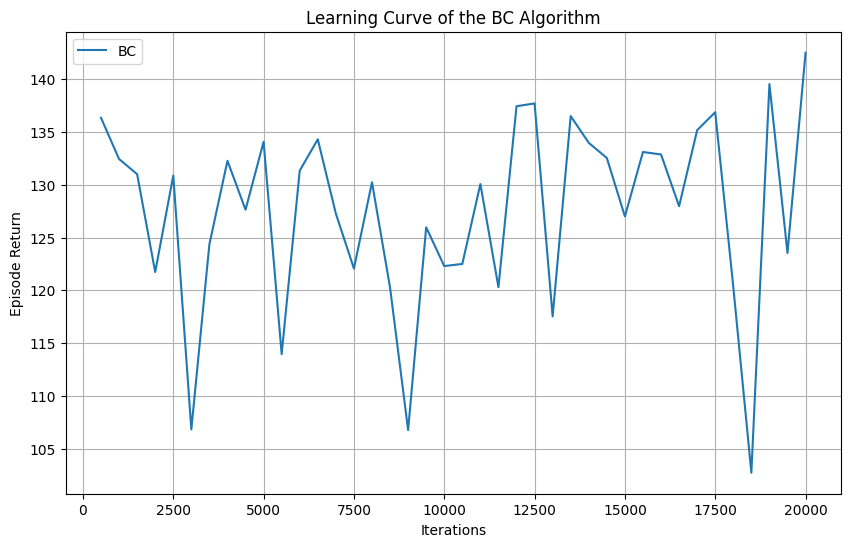

100%|████████████████████████████████████████████████████████| 20000/20000 [01:02<00:00, 322.03it/s]


In [56]:
##### DO NOT CHANGE #####
bc_train()

##### DO NOT CHANGE #####

## Part 3: Advantage-Weighted Actor-Critic (AWAC) (8pts)
In this part, we will implement the AWAC algorithm with double critic, which is similar to the technique used in Soft Actor-Critic(SAC) and TD3. The algorithm looks as follow. The AWAC algorithm can be used both as online or offline algorithm, in this exercise we focus only on its offline variant.

1. **Initialize:**
   - Initialize actor network $\pi_\theta(a|s)$ with parameters $\theta$.
   - Initialize two critic networks $Q_{\phi_1}(s, a)$ and $Q_{\phi_2}(s, a)$ with parameters $\phi_1$ and $\phi_2$.
   - Initialize target critic networks $Q_{\phi'_1}$ and $Q_{\phi'_2}$ with parameters $\phi'_1 \leftarrow \phi_1$ and $\phi'_2 \leftarrow \phi_2$.
   - Initialize replay buffer $\mathcal{D}$.

2. **For each iteration:**
   - **For each gradient step:**
     - Sample a batch of transitions $(s, a, r, s', d)$ from $\mathcal{D}$.
     - Compute target values using the smaller Q value of the two target critics: $$ y = r + \gamma (1 - d) \min_{i=1,2} Q_{\phi'_i}(s', a') $$
     - Update each critic by minimizing the loss: $$ L(\phi_i) = \frac{1}{|B|} \sum_{(s, a, r, s', d) \in B} (Q_{\phi_i}(s, a) - y)^2 \quad \text{for } i=1,2 $$
     - Compute the advantage for a given state action pair (s, a):
     \begin{equation}
     A(s,a)=\min_{i=1,2}Q_{\phi_i}(s,a) - \mathbb{E}_{a^\pi \sim \pi_{\theta}(a|s)}[\min_{i=1,2}Q_{\phi_i}(s,a^\pi)]
     \end{equation}
     
     **Important Hint** : here we use the expectation of Q function to represent the $V(s)$. In theory, we need multiple samples to get better estimation, however, only **one sample** usually works fine in practice.
     - Compute advantage-weighted policy gradient: $$ \nabla_\theta J(\theta) = \frac{1}{|B|} \sum_{(s, a) \in B} \nabla_\theta \log \pi_\theta(a|s) \exp \left( \frac{1}{\lambda} A(s,a) \right)$$
     - Update actor network by gradient ascent: $$ \theta \leftarrow \theta + \alpha \nabla_\theta J(\theta) $$
     - Softly update target critic networks: $$ \phi'_i \leftarrow \tau \phi_i + (1 - \tau) \phi'_i \quad \text{for } i=1,2 $$

3. **Repeat** until convergence or maximum number of iterations reached.

In [92]:
class AdvantageWeightActorCritic:
    def __init__(
        self,
        actor: nn.Module,
        actor_optimizer: torch.optim.Optimizer,
        critic_1: nn.Module,
        critic_1_optimizer: torch.optim.Optimizer,
        critic_2: nn.Module,
        critic_2_optimizer: torch.optim.Optimizer,
        gamma: float = 0.99,
        tau: float = 0.005,
        awac_lambda: float = 1.0,
        exp_adv_max: float = 100.0,
        device: str = "cpu",
    ):
        """
        Initializes the Advantage Weighted Actor-Critic (AWAC) agent.

        AWAC combines off-policy actor-critic methods with an advantage-weighted behavioral cloning loss to stabilize
        and improve the training of deep reinforcement learning policies.

        Parameters:
        - actor (nn.Module): The actor network.
        - actor_optimizer (torch.optim.Optimizer): Optimizer for the actor network.
        - critic_1 (nn.Module): The first critic network.
        - critic_1_optimizer (torch.optim.Optimizer): Optimizer for the first critic network.
        - critic_2 (nn.Module): The second critic network.
        - critic_2_optimizer (torch.optim.Optimizer): Optimizer for the second critic network.
        - gamma (float): Discount factor for future rewards. Default is 0.99.
        - tau (float): Soft update rate for the target networks. Default is 0.005.
        - awac_lambda (float): Scaling factor for advantage weights in the actor loss. Default is 1.0.
        - exp_adv_max (float): Maximum limit for exponentiated advantages. Default is 100.0.
        - device (str): The device on which to perform computations. Default is 'cpu'.

        This implementation uses two critic networks to estimate the value function, along with their target networks,
        which are updated using a soft update strategy. The actor's policy is updated using an advantage-weighted
        loss to encourage actions that lead to higher returns than currently estimated.
        """
        self._actor = actor
        self._actor_optimizer = actor_optimizer

        self._critic_1 = critic_1
        self._critic_1_optimizer = critic_1_optimizer
        self._target_critic_1 = deepcopy(critic_1)

        self._critic_2 = critic_2
        self._critic_2_optimizer = critic_2_optimizer
        self._target_critic_2 = deepcopy(critic_2)

        self._gamma = gamma
        self._tau = tau
        self._awac_lambda = awac_lambda
        self._exp_adv_max = exp_adv_max

        self._device = device

    def _actor_loss(self, states: torch.Tensor, actions: torch.Tensor) -> torch.Tensor:
        """
        Computes the loss for the actor network.

        The loss is calculated using an advantage-weighted behavioral cloning approach. It encourages the actor to
        take actions that lead to higher returns compared to the current policy's estimate.

        Parameters:
        - states (torch.Tensor): The batch of states.
        - actions (torch.Tensor): The batch of actions.

        Returns:
        - torch.Tensor: The computed loss for the actor network.

        The advantage is calculated as the difference between the Q-values from the critics for the actual
        actions and the estimated V-values from the critics for the actions sampled by the actor. These advantages
        are then scaled and used to weight the log probabilities of the actions in the actor's policy.
        """
        with torch.no_grad():
            pi_actions, _ = self._actor(states)

            """
            Calculate advantages and the weights
              Hints:
                1. V(s) can be represented using expectation of Q(s,a).
                   In practice, one sample could be enough
                2. self._actor() return action samples from the actor
                3. Weights should not contain gradient
            """
            # YOUR CODE HERE
            Q_given_action = torch.minimum(
                self._critic_1(states,actions),
                self._critic_2(states,actions))
            Q_avg_policy_action = torch.minimum(
                self._critic_1(states,pi_actions),
                self._critic_2(states,pi_actions))
            A = Q_given_action - Q_avg_policy_action
            
            weights = torch.exp(1/self._awac_lambda * A)
            weights = torch.clamp(weights, max=self._exp_adv_max)

        ### Implement the AWAC loss ###
        """
        Hint: be careful about the sign of loss, we are trying to maximize the
        objective.
        """
        # YOUR CODE HERE
        loss = -(self._actor.log_prob(states,actions) * weights).mean()
        return loss

    def _critic_loss(self, states, actions, rewards, next_states, dones):
        """
        Computes the loss for the critic networks.

        The loss is the Mean Squared Error (MSE) between the critics' Q-value estimates and the target Q-values,
        which are computed using the Bellman equation.

        Parameters:
        - states, actions, rewards, next_states, dones: Tensors representing the batch of transitions.

        Returns:
        - torch.Tensor: The computed loss for the critic networks.

        The target Q-values are calculated using the minimum Q-value of the two target critics for the next state
        and action pair, adjusted by the reward and discount factor.
        """
        """
        Hints:
          1. next_action could be compute by calling self._actor(next_states)
          2. targets should not contain gradient
        """
        # YOUR CODE HERE
        with torch.no_grad():
            next_actions,log_prob = self._actor(next_states)
            #print("next actions ", next_actions)
            #print("next stats ", next_states)
            y = rewards + self._gamma * (1-dones) * torch.minimum(
                self._target_critic_1.forward(next_states, next_actions),
                self._target_critic_2.forward(next_states, next_actions))
        critic_1_loss = F.mse_loss(self._critic_1.forward(states,actions), y)

        critic_2_loss = F.mse_loss(self._critic_2.forward(states,actions), y)

        loss = critic_1_loss + critic_2_loss
        return loss

    def _update_target_network(self, target_network: nn.Module, network: nn.Module):
        """
        Performs a soft update on the target network.

        Parameters:
        - target_network (nn.Module): The target network to be updated.
        - network (nn.Module): The current network whose parameters are used for the update.

        This method updates the target network's parameters by blending them with the parameters from the
        current network, controlled by the tau parameter. This soft update helps in stabilizing training by
        providing a slowly changing target for the critics.
        """
        for target_param, param in zip(target_network.parameters(), network.parameters()):
            target_param.data.copy_(self._tau * param.data + (1.0 - self._tau) * target_param.data)

    def _update_actor(self, states: torch.Tensor, actions: torch.Tensor) -> torch.Tensor:
        """
        Updates the actor network by minimizing its loss.

        Parameters:
        - states (torch.Tensor): The batch of states.
        - actions (torch.Tensor): The batch of actions.

        Returns:
        - torch.Tensor: The actor loss after the update.

        This method performs a gradient descent step to update the actor's parameters in order to minimize
        the advantage-weighted loss.
        """
        self._actor_optimizer.zero_grad()
        loss = self._actor_loss(states, actions)
        loss.backward()
        self._actor_optimizer.step()
        return loss.item()

    def _update_critics(
        self,
        states: torch.Tensor,
        actions: torch.Tensor,
        rewards: torch.Tensor,
        next_states: torch.Tensor,
        dones: torch.Tensor,
    ) -> torch.Tensor:
        """
        Updates the critic networks by minimizing their loss.

        Parameters:
        - states, actions, rewards, next_states, dones: Tensors representing the batch of transitions.

        Returns:
        - torch.Tensor: The critic loss after the update.

        This method performs a gradient descent step to update the critic networks' parameters in order to minimize
        the MSE loss between their Q-value estimates and the target Q-values.
        """
        self._critic_1_optimizer.zero_grad()
        self._critic_2_optimizer.zero_grad()
        loss = self._critic_loss(states, actions, rewards, next_states, dones)
        loss.backward()
        self._critic_1_optimizer.step()
        self._critic_2_optimizer.step()
        return loss.item()

    def update(
        self,
        replay_buffer: ReplayBuffer,
        batch_size: int,
    ) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Performs a training update on both the actor and critic networks.

        Parameters:
        - replay_buffer (ReplayBuffer): The replay buffer to sample transitions from.
        - batch_size (int): The number of transitions to sample for the update.

        Returns:
        - Tuple[torch.Tensor, torch.Tensor]: The actor and critic losses after the update.

        This method samples a batch of transitions from the replay buffer and uses them to update both the actor
        and critic networks. It also updates the target critic networks using the soft update method.
        """
        states, actions, rewards, next_states, dones = replay_buffer.sample(batch_size)
        critic_loss = self._update_critics(states, actions, rewards, next_states, dones)
        actor_loss = self._update_actor(states, actions)
        self._update_target_network(self._target_critic_1, self._critic_1)
        self._update_target_network(self._target_critic_2, self._critic_2)
        return actor_loss, critic_loss

In [93]:
##### DO NOT CHANGE #####
# ID: cell-9fcbd0bfc147033b - possible points: 8

# Test AWAC implementation
print("Testing AWAC...")

torch.manual_seed(SEED)
_test_awac_actor = Actor(state_dim=4, action_dim=1, hidden_dim=64)
_test_awac_critic1 = Critic(state_dim=4, action_dim=1, hidden_dim=64)
_test_awac_critic2 = Critic(state_dim=4, action_dim=1, hidden_dim=64)

_test_awac = AdvantageWeightActorCritic(
    actor=_test_awac_actor,
    actor_optimizer=torch.optim.Adam(_test_awac_actor.parameters(), lr=3e-4),
    critic_1=_test_awac_critic1,
    critic_1_optimizer=torch.optim.Adam(_test_awac_critic1.parameters(), lr=3e-4),
    critic_2=_test_awac_critic2,
    critic_2_optimizer=torch.optim.Adam(_test_awac_critic2.parameters(), lr=3e-4),
    device="cpu"
)

_test_states = torch.randn(32, 4)
_test_actions = torch.randn(32, 1).clamp(-1, 1)
_test_rewards = torch.randn(32, 1)
_test_next_states = torch.randn(32, 4)
_test_dones = torch.zeros(32, 1)

# Test actor loss
_actor_loss = _test_awac._actor_loss(_test_states, _test_actions)
assert _actor_loss.ndim == 0, "Actor loss should be a scalar"
assert not torch.isnan(_actor_loss), "Actor loss should not be NaN"

# Test critic loss
_critic_loss = _test_awac._critic_loss(_test_states, _test_actions, _test_rewards, _test_next_states, _test_dones)
assert _critic_loss.ndim == 0, "Critic loss should be a scalar"
assert _critic_loss.item() >= 0, "MSE loss should be non-negative"

print("✓ AWAC passed basic tests!")


##### DO NOT CHANGE #####

Testing AWAC...
✓ AWAC passed basic tests!


In [94]:
##### DO NOT CHANGE #####
def awac_train():
    # Load dataset and environment
    minari_dataset = minari.load_dataset(DATASET_ID, download=True)
    env = minari_dataset.recover_environment(eval_env=True)

    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Compute normalization statistics from the dataset
    state_mean, state_std, _, _ = compute_mean_std_from_minari(minari_dataset)

    # Wrap the environment to apply state normalization during evaluation
    env = wrap_env(env, state_mean=state_mean, state_std=state_std)

    # Initialize replay buffer
    replay_buffer = ReplayBuffer(
        state_dim=state_dim,
        action_dim=action_dim,
        buffer_size=2_000_000,
        device=DEVICE,
    )
    replay_buffer.load_minari_dataset(minari_dataset)
    # Normalize observations in the replay buffer
    replay_buffer.normalize_states(state_mean, state_std)
    set_seed(SEED, env)

    kwargs = {
        "state_dim": state_dim,
        "action_dim": action_dim,
        "hidden_dim": 256,
    }

    actor = Actor(min_action=float(env.action_space.low[0]), max_action=float(env.action_space.high[0]), **kwargs)
    actor.to(DEVICE)
    actor_optimizer = torch.optim.Adam(actor.parameters(), lr=LEARNING_RATE)

    critic_1 = Critic(**kwargs)
    critic_1.to(DEVICE)
    critic_1_optimizer = torch.optim.Adam(critic_1.parameters(), lr=LEARNING_RATE)
    critic_2 = Critic(**kwargs)
    critic_2.to(DEVICE)
    critic_2_optimizer = torch.optim.Adam(critic_2.parameters(), lr=LEARNING_RATE)

    awac = AdvantageWeightActorCritic(
        actor=actor,
        actor_optimizer=actor_optimizer,
        critic_1=critic_1,
        critic_1_optimizer=critic_1_optimizer,
        critic_2=critic_2,
        critic_2_optimizer=critic_2_optimizer,
        gamma=0.99,
        tau=0.005,
        awac_lambda=1.0,
        exp_adv_max=100.0,
        device=DEVICE,
    )

    eval_score_list = []
    iteration_list = []
    for t in trange(20000, ncols=100):
        actor_loss, critic_loss = awac.update(replay_buffer, batch_size=256)
        if (t + 1) % 500 == 0:
            eval_scores = evaluate_policy(env, actor, num_episodes=30)
            print(f"Eval_scores: {eval_scores.mean():.2f} +/- {eval_scores.std():.2f}")
            print(f"Actor loss: {actor_loss:.4f}, critic loss: {critic_loss:.4f}")
            eval_score_list.append(eval_scores.mean())
            iteration_list.append(t+1)
            update_plot(iteration_list, eval_score_list, 'AWAC')

##### DO NOT CHANGE #####

## Run the following block to train the AWAC agent!

Hints:
- The AWAC agent should achieve better performance than BC
- On the InvertedPendulum environment, AWAC should achieve episode returns close to 1000
- There may be some fluctuation at the beginning of training

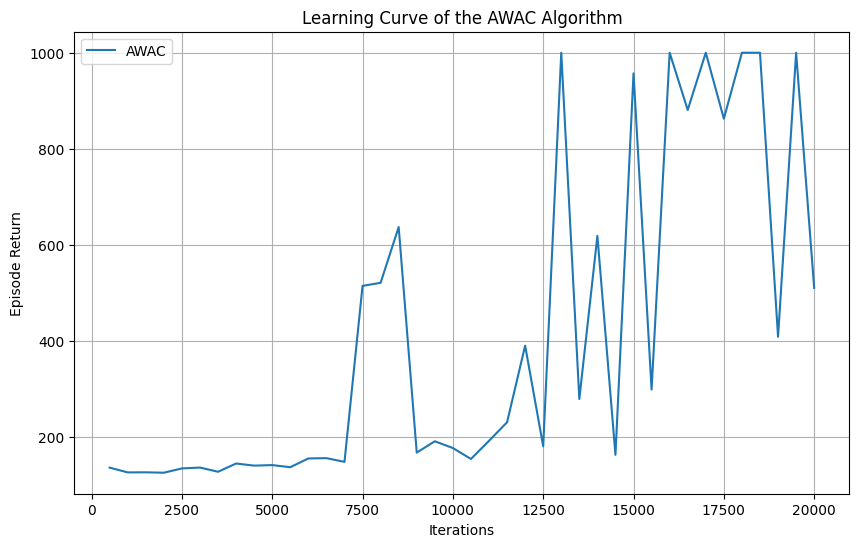

100%|████████████████████████████████████████████████████████| 20000/20000 [03:02<00:00, 109.37it/s]


In [95]:
##### DO NOT CHANGE #####
awac_train()

##### DO NOT CHANGE #####

## Self-test questions (No Points)
1. Why AWAC can achieve better performance than BC?


2. Why AWAC uses policy gradient instead of reparameterization gradient?


3. What are the challenges of applying offline RL in the real world? (Open-ended)
